# Ejercicio 4

## Loading Dataset, already processed

In [90]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [91]:
dfWind = pd.read_csv('../data/data_wind_imputed.csv')

In [92]:
dfWind.head()

,Hora,Dirección del viento horaria (gr),Velocidad horario del viento (m/s),Máxima ráfaga de viento (m/s),Fecha,Humedad rel. máx. hora anterior (AUT),Humedad rel. mín. hora anterior (AUT),Temperatura máx. hora anterior (AUT) (K),Temperatura mín. hora anterior (AUT) (K),Humedad relativa horaria,"Presión atmosférica a nivel de estación, horaria (Pa)",Precipitación total por hora (m),Presión atmosférica máx. hora anterior (AUT) (Pa),Presión atmosférica mín. hora anterior (AUT) (Pa)
0,12,0.809017,1.8,3.8,2000-01-01 12:00:00,0.69,0.60,295.75,293.85,0.61,88820.0,0.0,88820.0,88770.0
1,13,0.965926,2.7,4.7,2000-01-01 13:00:00,0.62,0.55,297.35,295.65,0.55,88840.0,0.0,88840.0,88820.0
2,14,0.891007,2.0,4.9,2000-01-01 14:00:00,0.56,0.50,298.65,297.45,0.51,88810.0,0.0,88840.0,88810.0
3,15,0.848048,2.5,5.8,2000-01-01 15:00:00,0.52,0.44,300.55,298.15,0.44,88740.0,0.0,88810.0,88740.0
4,16,0.224951,2.4,5.8,2000-01-01 16:00:00,0.50,0.43,300.25,298.65,0.46,88650.0,0.0,88740.0,88650.0


In [93]:
dfWind.shape[0]

90276

## Defining models and their parameters

In [94]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model

grid_nb = {}

model_dict = {}

model_dict['Bayesan Ridge'] = {'model': linear_model.BayesianRidge(), 'grid': {'model__alpha_1': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}, 'MAPE_score': {}, 'R2_score': {}, 'RMSE_score': {}}
model_dict['Decision Tree'] = {'model': DecisionTreeRegressor(random_state=42), 'grid': {'model__max_depth': (1, 20),'model__min_samples_split' : (0.1,1.0)}, 'MAPE_score': {}, 'R2_score': {}, 'RMSE_score': {}}
model_dict['Random Forest'] = {'model': RandomForestRegressor(random_state=42), 'grid': {'model__max_depth': (1, 20),'model__n_estimators': [100, 200, 300]}, 'n_estimators': range(1, 20), 'MAPE_score': {}, 'R2_score': {}, 'RMSE_score': {}}
model_dict['Gradient Boosting'] = {'model': GradientBoostingRegressor(random_state=42), 'grid': {'model__max_depth': (1, 20) ,'model__min_samples_split' : (0.1,1.0)}, 'MAPE_score': {}, 'R2_score': {}, 'RMSE_score': {}}
model_dict['Knn'] = {'model': KNeighborsRegressor(), 'grid': {'model__n_neighbors': (1, 20)}, 'MAPE_score': {}, 'R2_score': {}, 'RMSE_score': {}}
model_dict['Ridge'] = {'model': Ridge(), 'grid': {'model__alpha': [0.001,0.01,0.1,1,10,100,1000]}, 'MAPE_score': {}, 'R2_score': {}, 'RMSE_score': {}}
model_dict['Lasso'] = {'model': Lasso(), 'grid': {'model__alpha': [0.001,0.01,0.1,1,10,100,1000]}, 'MAPE_score': {}, 'R2_score': {}, 'RMSE_score': {}}
for model_name, model_info in model_dict.items():
    model_info['MAPE_score'] = []
    model_info['R2_score'] = []
    model_info['RMSE_score'] = []
cv = 10

number_of_days = [7,14,21,28]

model_dict




{'Bayesan Ridge': {'model': BayesianRidge(),
  'grid': {'model__alpha_1': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]},
  'MAPE_score': [],
  'R2_score': [],
  'RMSE_score': []}}

I instantiated a dictionary of models containg their parameters and their future scores so that it will be easier to manage them later on

In [95]:
results_dict = {}
for model_name, model_info in model_dict.items():
    results_dict[model_name] = {}
    for days in number_of_days:
        results_dict[model_name][days] = {'y_pred': [], 'y_test': []}
        

In [96]:
number_of_days

[7, 14, 21, 28]

In [97]:
dfWind.head()

,Hora,Dirección del viento horaria (gr),Velocidad horario del viento (m/s),Máxima ráfaga de viento (m/s),Fecha,Humedad rel. máx. hora anterior (AUT),Humedad rel. mín. hora anterior (AUT),Temperatura máx. hora anterior (AUT) (K),Temperatura mín. hora anterior (AUT) (K),Humedad relativa horaria,"Presión atmosférica a nivel de estación, horaria (Pa)",Precipitación total por hora (m),Presión atmosférica máx. hora anterior (AUT) (Pa),Presión atmosférica mín. hora anterior (AUT) (Pa)
0,12,0.809017,1.8,3.8,2000-01-01 12:00:00,0.69,0.60,295.75,293.85,0.61,88820.0,0.0,88820.0,88770.0
1,13,0.965926,2.7,4.7,2000-01-01 13:00:00,0.62,0.55,297.35,295.65,0.55,88840.0,0.0,88840.0,88820.0
2,14,0.891007,2.0,4.9,2000-01-01 14:00:00,0.56,0.50,298.65,297.45,0.51,88810.0,0.0,88840.0,88810.0
3,15,0.848048,2.5,5.8,2000-01-01 15:00:00,0.52,0.44,300.55,298.15,0.44,88740.0,0.0,88810.0,88740.0
4,16,0.224951,2.4,5.8,2000-01-01 16:00:00,0.50,0.43,300.25,298.65,0.46,88650.0,0.0,88740.0,88650.0


## Tuning models and training them

Using BayesSearchCV i tune the models by searching for the best paramaters with bayesan optimization, this chunk of code takes every model out of the dictionary and finds the best hyperparameters for every possible scenario (in this case the number of days), so that we get the best parameters for every possible way of validation.

In [98]:
from sklearn.discriminant_analysis import StandardScaler
from skopt import BayesSearchCV
from sklearn.pipeline import Pipeline
from copy import deepcopy
# Create an empty dictionary to store the best parameters for each model
best_params = {}

for model in model_dict.keys():
    best_params[model] = []
    model_dict[model]['model_ready'] = []
# Iterate over the models and perform parameter search
for numDays in number_of_days:
    X_train = dfWind.iloc[0:numDays*24].drop(['Velocidad horario del viento (m/s)', 'Fecha'], axis=1)
    y_train = dfWind.iloc[0:numDays*24]['Velocidad horario del viento (m/s)']
    for model in model_dict.keys():
        pipeline = Pipeline([('scaler', StandardScaler()), ('model', deepcopy(model_dict[model]['model']))])
        # Get the parameter search space for the current model
        param = model_dict[model]['grid']
        if len(param) == 0:
            continue
        # Create the BayesSearchCV object for the current model
        search_cv = BayesSearchCV(pipeline, param, cv=5, n_iter=50, random_state=42)
        
        # Fit the BayesSearchCV object to find the best parameters
        search_cv.fit(X_train, y_train)
        
        model_dict[model]['model_ready'].append(search_cv)
        # Store the best parameters for the current model
        best_params[model].append(search_cv.best_params_)
        print(f"Best parameters for {model} and with {numDays}: {search_cv.best_params_}")


Best parameters for Bayesan Ridge and with 7: OrderedDict([('model__alpha_1', 1e-06)])
Best parameters for Bayesan Ridge and with 14: OrderedDict([('model__alpha_1', 0.1)])
Best parameters for Bayesan Ridge and with 21: OrderedDict([('model__alpha_1', 0.1)])
Best parameters for Bayesan Ridge and with 28: OrderedDict([('model__alpha_1', 1e-06)])


How we can see every model has different best hyperparamaters for every scenario of validation

In [99]:
# for model in model_dict.keys():
#     for param in best_params[model]:
#         for key in param.keys():
#             print(key)
#             param[key[6:]] = param.pop(key)

Now we will train every model for each scenario, using (7,14,21,28) days as training dataset and the following day as validation

In [100]:
# Create a list to store the trained models
import numpy as np
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.base import clone


trained_models = []

# Iterate over each model and train them
for model in model_dict.keys():
    print(f'Training {model}...')
    pipeline = Pipeline([('scaler', StandardScaler()), ('model', model_dict[model]['model'])])
    rmse_scores = []
    mape_scores = []
    r2_scores = []
    for n_days in number_of_days:
        print(f'Training {model} with {n_days} days...')
        for i in range(0,dfWind.shape[0] - (n_days + 1)*24, 24):
            model_tmp = clone(model_dict[model]['model_ready'][number_of_days.index(n_days)])
            pipeline = Pipeline([('scaler', StandardScaler()), ('model', model_dict[model]['model'])])
            X_train = dfWind.iloc[i:i+n_days*24].drop(['Velocidad horario del viento (m/s)', 'Fecha'], axis=1)
            y_train = dfWind.iloc[i:i+n_days*24]['Velocidad horario del viento (m/s)']            
            pipeline.fit(X_train, y_train)
            X_valid = dfWind.iloc[i+n_days*24:i+((n_days + 1)*24)].drop(['Velocidad horario del viento (m/s)', 'Fecha'], axis=1)
            y_valid = dfWind.iloc[i+n_days*24:i+((n_days + 1)*24)]['Velocidad horario del viento (m/s)']
            score = pipeline.score(X_valid, y_valid)
            y_true = y_valid
            y_pred = pipeline.predict(X_valid)
            results_dict[model][n_days]['y_pred'].append(y_pred)
            results_dict[model][n_days]['y_test'].append(y_true)
            rmse_score = mean_squared_error(y_true, y_pred)
            mape_score = mean_absolute_percentage_error(y_true, y_pred)
            r2_score_tmp = r2_score(y_true, y_pred)
            rmse_scores.append(rmse_score)
            mape_scores.append(mape_score)
            r2_scores.append(r2_score_tmp)
        # Save the scores
        model_dict[model]['MAPE_score'].append(np.mean(mape_scores))
        model_dict[model]['R2_score'].append(np.mean(r2_scores))
        model_dict[model]['RMSE_score'].append(np.mean(rmse_scores))
        rmse_scores = []
        mape_scores = []
        r2_scores = []
        trained_models.append(pipeline)
        print(f'{model} trained!')
        print(f'MAPE: {model_dict[model]["MAPE_score"]}')
        print(f'R2: {model_dict[model]["R2_score"]}')
        print(f'RMSE: {model_dict[model]["RMSE_score"]}')


Training Bayesan Ridge...
Training Bayesan Ridge with 7 days...
Bayesan Ridge trained!
MAPE: [73898798301139.05]
R2: [-0.06712612345592733]
RMSE: [1.2550013476282504]
Training Bayesan Ridge with 14 days...
Bayesan Ridge trained!
MAPE: [73898798301139.05, 68914432611756.83]
R2: [-0.06712612345592733, 0.26625958763597585]
RMSE: [1.2550013476282504, 0.7262360716599138]
Training Bayesan Ridge with 21 days...
Bayesan Ridge trained!
MAPE: [73898798301139.05, 68914432611756.83, 67492324032848.99]
R2: [-0.06712612345592733, 0.26625958763597585, 0.09949856424185008]
RMSE: [1.2550013476282504, 0.7262360716599138, 0.6554768651759865]
Training Bayesan Ridge with 28 days...
Bayesan Ridge trained!
MAPE: [73898798301139.05, 68914432611756.83, 67492324032848.99, 67383275300127.99]
R2: [-0.06712612345592733, 0.26625958763597585, 0.09949856424185008, 0.22216342362020222]
RMSE: [1.2550013476282504, 0.7262360716599138, 0.6554768651759865, 0.6075941838352815]


In [101]:
import pickle

# File path to save the dictionary
file_path = '../data/model_exo4_results.pkl'

# Save the dictionary into a file
with open(file_path, 'wb') as file:
    pickle.dump(model_dict, file)


In [102]:
import pickle

# Specify the path to the pickle file
file_path = '../data/model_exo4_results.pkl'

# Open the pickle file in read mode
with open(file_path, 'rb') as file:
    # Load the dictionary from the pickle file
    dictionary = pickle.load(file)

# Now you can use the dictionary
print(dictionary)


{'Bayesan Ridge': {'model': BayesianRidge(), 'grid': {'model__alpha_1': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]}, 'MAPE_score': [73898798301139.05, 68914432611756.83, 67492324032848.99, 67383275300127.99], 'R2_score': [-0.06712612345592733, 0.26625958763597585, 0.09949856424185008, 0.22216342362020222], 'RMSE_score': [1.2550013476282504, 0.7262360716599138, 0.6554768651759865, 0.6075941838352815], 'model_ready': [BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                        ('model', BayesianRidge())]),
              random_state=42,
              search_spaces={'model__alpha_1': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01, 0.1]}), BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                        ('model', BayesianRidge())]),
              random_state=42,
              search_spaces={'model__alpha_1': [1e-06, 1e-05,

In [103]:
model_dict = dictionary

In [104]:
list_df_scores = []
model_names = []
list_r2 = []
list_mape = []
list_rmse = []
min_rmse = 1000
for i in range(len(number_of_days)):
    for model in model_dict.keys():
        if(i == 0):
            model_names.append(model)
        list_r2.append(model_dict[model]['R2_score'][i])
        list_mape.append(model_dict[model]['MAPE_score'][i])
        list_rmse.append(model_dict[model]['RMSE_score'][i])
        if(model_dict[model]['RMSE_score'][i] < min_rmse):
            num_days = number_of_days[i]
            min_rmse = model_dict[model]['RMSE_score'][i]
            best_model = model
    df_scores = pd.DataFrame({'Model': model_names, 'R2': list_r2, 'MAPE': list_mape, 'RMSE': list_rmse})
    list_mape = []
    list_r2 = []
    list_rmse = []
    list_df_scores.append(df_scores)



In [105]:
for i in range(len(number_of_days)):
    print(f'Number of days: {number_of_days[i]}')
    print(list_df_scores[i].to_string(index=False))


Number of days: 7
        Model        R2         MAPE     RMSE
Bayesan Ridge -0.067126 7.389880e+13 1.255001
Number of days: 14
        Model      R2         MAPE     RMSE
Bayesan Ridge 0.26626 6.891443e+13 0.726236
Number of days: 21
        Model       R2         MAPE     RMSE
Bayesan Ridge 0.099499 6.749232e+13 0.655477
Number of days: 28
        Model       R2         MAPE     RMSE
Bayesan Ridge 0.222163 6.738328e+13 0.607594


Let's analize the RMSE results to find the best model and the best training set:

In [106]:
list_df_scores = []
list_rmse = []
for i in range(len(number_of_days)):
    for model in model_dict.keys():  
        list_rmse.append(model_dict[model]['RMSE_score'][i])
    name = 'RMSE_' + str(number_of_days[i])
    if i == 0:
        df_scores = pd.DataFrame({'Model': model_names, name: list_rmse})
    else:
        df_scores = pd.DataFrame({name: list_rmse})
    list_df_scores.append(df_scores)
    list_rmse = []

In [107]:
df_scores = pd.concat(list_df_scores, axis=1)
df_scores

,Model,RMSE_7,RMSE_14,RMSE_21,RMSE_28
0,Bayesan Ridge,1.255001,0.726236,0.655477,0.607594


In [108]:
print(f'The best model is {best_model} with a RMSE of {min_rmse}, and {num_days} days of training')

The best model is Bayesan Ridge with a RMSE of 0.6075941838352815, and 28 days of training


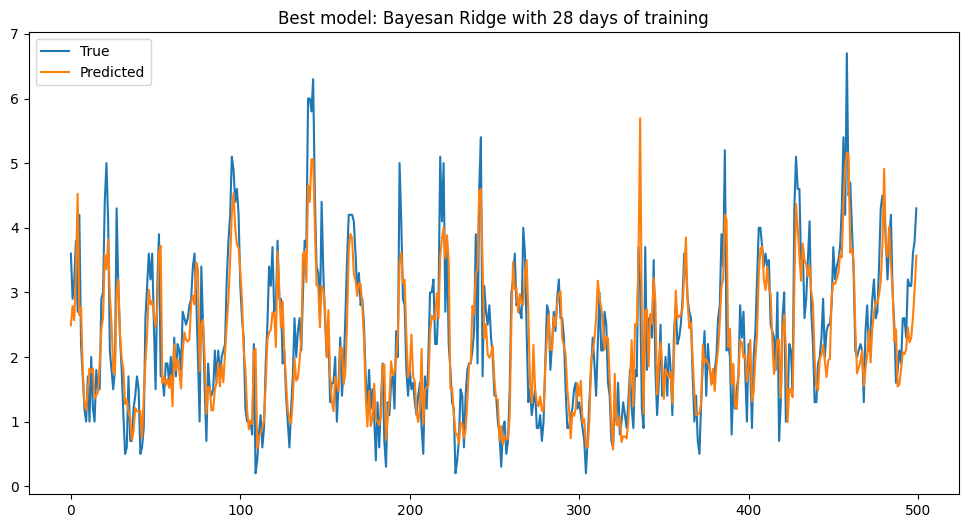

In [118]:
#plot the best model results
import matplotlib.pyplot as plt
import numpy as np

y_pred = results_dict[best_model][num_days]['y_pred']
y_test = results_dict[best_model][num_days]['y_test']
y_pred = np.array(y_pred).flatten()
y_test = np.array(y_test).flatten()
plt.figure(figsize=(12, 6))
plt.plot(y_test[-500:], label='True')
plt.plot(y_pred[-500:], label='Predicted')
plt.legend()
plt.title(f'Best model: {best_model} with {num_days} days of training')
plt.show()

